<a href="https://colab.research.google.com/github/gideononyewuenyi/AirQualityViz/blob/main/Data_Viz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Air quality in Lagos**

In this notebook, we will explore a dataset of air quality obtained from the Purpleair sensor in Lagos that took readings every 30min from 12/2019 until it stopped reporting back in 6/2021

Description of some features:

1. PM 1.0 - Ambient suspended particulate matter,  the mass concentration of ambient suspended particulate matter (PM) of an aerodynamic diameter of less than 1 micrometer.

2. PM 2.5  - Fine particulate matter, an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated

3. PM 10 - particulate matter in the air with a diameter of 10 micrometers or less, including smoke, dust, soot, salts, acids, and metals. Particulate matter can also be formed indirectly when gases emitted from motor vehicles and industries undergo chemical reactions in the atmosphere.

Note that: CF=1 is applicable for a standard environment (indoors / chamber) while the CF=ATM is applicable under atmospheric environment (outdoors / am202bient).

Particulate matter is the sum of all solid and liquid particles suspended in air many of which are hazardous. This complex mixture includes both organic and inorganic particles, such as dust, pollen, soot, smoke, and liquid droplets.


4. RSSI_dbm - This is referred to the signal strength of Wifi

5. Temperature - The degree of hotness or coldness measured on a definite scale.

6. Humidity - Humidity is the amount of water vapor in the air. If there is a lot of water vapor in the air, the humidity will be high and vice versa

7. Uptime - The time during which the sensor is in operation.

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from datetime import datetime
sns.set_theme(style="whitegrid")
sns.set_palette('bright')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [250]:
url = "https://raw.githubusercontent.com/gideononyewuenyi/Exploratory-analysis/main/Lekki%20Phase%201%20(outside)%20(6.451397%203.471201)%20Primary%2030_minute_average%2012_17_2019%206_6_2021.csv"
df = pd.read_csv (url)

In [251]:
df.sample(5)

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9
31318,2021-03-21 06:30:00 UTC,0.89,1.45,1.63,2598.00,-72.00,65.00,21.13,1.45,NaN
37368,2021-06-03 13:30:00 UTC,4.18,5.45,5.79,69.73,-77.13,96.07,46.00,5.45,NaN
2927,2020-02-28 06:00:00 UTC,19.11,24.63,25.42,71568.00,-54.93,79.00,17.00,24.59,NaN
22939,2020-10-18 17:00:00 UTC,6.65,9.13,9.60,69953.00,-75.67,74.00,32.00,9.13,NaN
16129,2020-07-27 02:00:00 UTC,7.69,10.64,11.35,38088.00,-60.20,83.33,32.80,10.64,NaN


In [252]:
df.describe()

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9
count,37538.000000,37538.000000,37538.000000,37538.000000,37538.000000,37538.000000,37538.000000,37538.000000,0.0
mean,6.007100,8.584424,9.092260,22233.899164,-66.844293,78.717398,31.854816,7.991469,NaN
std,10.415071,16.605593,18.286916,18422.876237,8.783105,6.350175,12.522367,12.175910,NaN
min,0.000000,0.000000,0.000000,2.000000,-87.000000,52.200000,10.000000,0.000000,NaN
25%,1.470000,2.120000,2.280000,6348.000000,-74.200000,73.930000,22.000000,2.120000,NaN
50%,3.470000,4.750000,5.030000,18293.000000,-69.930000,79.000000,30.000000,4.750000,NaN
75%,6.990000,9.580000,10.037500,34524.000000,-58.330000,83.000000,40.530000,9.570000,NaN
max,360.400000,737.140000,848.470000,71568.000000,-52.600000,105.270000,84.730000,490.740000,NaN


In [253]:
df.shape

(37595, 10)

In [254]:
df.columns

Index(['created_at', 'PM1.0_CF1_ug/m3', 'PM2.5_CF1_ug/m3', 'PM10.0_CF1_ug/m3',
       'UptimeMinutes', 'RSSI_dbm', 'Temperature_F', 'Humidity_%',
       'PM2.5_ATM_ug/m3', 'Unnamed: 9'],
      dtype='object')

In [255]:
df.dtypes

created_at           object
PM1.0_CF1_ug/m3     float64
PM2.5_CF1_ug/m3     float64
PM10.0_CF1_ug/m3    float64
UptimeMinutes       float64
RSSI_dbm            float64
Temperature_F       float64
Humidity_%          float64
PM2.5_ATM_ug/m3     float64
Unnamed: 9          float64
dtype: object

In [256]:
df.isnull().sum()

created_at              0
PM1.0_CF1_ug/m3        57
PM2.5_CF1_ug/m3        57
PM10.0_CF1_ug/m3       57
UptimeMinutes          57
RSSI_dbm               57
Temperature_F          57
Humidity_%             57
PM2.5_ATM_ug/m3        57
Unnamed: 9          37595
dtype: int64

In [257]:
df.isnull().sum().sum()

38051

In [258]:
new_df=df.drop(columns = ['Unnamed: 9'])

In [259]:
new_df.columns

Index(['created_at', 'PM1.0_CF1_ug/m3', 'PM2.5_CF1_ug/m3', 'PM10.0_CF1_ug/m3',
       'UptimeMinutes', 'RSSI_dbm', 'Temperature_F', 'Humidity_%',
       'PM2.5_ATM_ug/m3'],
      dtype='object')

In [260]:
new_df.isnull().sum()

created_at           0
PM1.0_CF1_ug/m3     57
PM2.5_CF1_ug/m3     57
PM10.0_CF1_ug/m3    57
UptimeMinutes       57
RSSI_dbm            57
Temperature_F       57
Humidity_%          57
PM2.5_ATM_ug/m3     57
dtype: int64

In [261]:
new_df.isnull().sum().sum()

456

In [262]:
new_df.shape

(37595, 9)

In [263]:
new_df_drop = new_df.dropna()

In [264]:
new_df_drop.shape

(37538, 9)

In [265]:
new_df_drop.isnull().sum()

created_at          0
PM1.0_CF1_ug/m3     0
PM2.5_CF1_ug/m3     0
PM10.0_CF1_ug/m3    0
UptimeMinutes       0
RSSI_dbm            0
Temperature_F       0
Humidity_%          0
PM2.5_ATM_ug/m3     0
dtype: int64

In [266]:
new_df_ffill = new_df.fillna(method='ffill')

In [267]:
new_df_bfill = new_df.fillna(method='bfill')

In [268]:
new_df_ffill.shape

(37595, 9)

In [269]:
new_df_bfill.shape

(37595, 9)

In [270]:
new_df_drop.shape

(37538, 9)

In [271]:
new_df_ffill.head()

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2019-12-17 20:00:00 UTC,1.99,3.05,3.27,3.25,-53.75,72.50,16.50,3.05
1,2019-12-17 20:30:00 UTC,1.89,2.80,3.09,11.19,-53.69,73.88,15.12,2.80
2,2019-12-17 21:00:00 UTC,34.62,93.43,141.47,38.00,-53.87,74.07,15.40,63.67
3,2019-12-17 21:30:00 UTC,0.89,2.59,3.58,68.00,-55.47,76.53,15.00,2.59
4,2019-12-17 22:00:00 UTC,0.00,0.00,0.01,98.00,-54.60,77.00,14.87,0.00


In [272]:
new_df_ffill.tail()

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
37590,2021-06-06 06:00:00 UTC,40.47,56.64,59.53,798.0,-77.33,86.00,64.00,44.06
37591,2021-06-06 06:30:00 UTC,40.47,56.64,59.53,798.0,-77.33,86.00,64.00,44.06
37592,2021-06-06 07:00:00 UTC,26.22,37.35,39.07,962.0,-82.31,88.38,62.62,34.06
37593,2021-06-06 07:30:00 UTC,23.22,33.16,34.51,990.0,-75.20,89.73,57.33,31.54
37594,2021-06-06 08:00:00 UTC,23.23,32.86,33.53,1008.0,-75.67,91.00,55.33,31.37


In [273]:
new_df_ffill.sample(5)

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
15664,2020-07-22 09:30:00 UTC,6.17,7.81,7.94,31338.0,-59.53,83.13,31.87,7.81
34685,2021-04-25 10:00:00 UTC,0.00,0.07,0.11,33983.0,-73.67,73.00,27.00,0.07
31874,2021-03-27 20:30:00 UTC,0.43,0.82,0.90,2652.0,-72.13,73.87,35.20,0.82
31246,2021-03-20 18:30:00 UTC,0.53,0.88,0.97,1878.0,-70.40,64.40,23.00,0.88
17754,2020-08-13 08:30:00 UTC,7.09,9.89,10.17,62958.0,-56.80,84.47,36.53,9.89


In [274]:
new_df_ffill.describe()

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
count,37595.000000,37595.000000,37595.000000,37595.000000,37595.000000,37595.00000,37595.000000,37595.000000
mean,6.007333,8.583804,9.091479,22210.031092,-66.849480,78.72105,31.860672,7.990410
std,10.414809,16.602185,18.282239,18421.318729,8.782886,6.35755,12.536009,12.174536
min,0.000000,0.000000,0.000000,2.000000,-87.000000,52.20000,10.000000,0.000000
25%,1.460000,2.120000,2.280000,6326.500000,-74.200000,73.93000,22.000000,2.120000
50%,3.460000,4.750000,5.030000,18243.000000,-69.930000,79.00000,30.000000,4.750000
75%,6.990000,9.580000,10.035000,34494.000000,-58.330000,83.00000,40.530000,9.570000
max,360.400000,737.140000,848.470000,71568.000000,-52.600000,105.27000,84.730000,490.740000


In [275]:
new_df_ffill.nunique()

created_at          23697
PM1.0_CF1_ug/m3      2752
PM2.5_CF1_ug/m3      3423
PM10.0_CF1_ug/m3     3528
UptimeMinutes       18029
RSSI_dbm              627
Temperature_F         699
Humidity_%           1059
PM2.5_ATM_ug/m3      3299
dtype: int64

In [276]:
new_df_ffill.rename(columns={'created_at': 'Date/Time'}, inplace=True)

In [277]:
new_df_ffill.dtypes

Date/Time            object
PM1.0_CF1_ug/m3     float64
PM2.5_CF1_ug/m3     float64
PM10.0_CF1_ug/m3    float64
UptimeMinutes       float64
RSSI_dbm            float64
Temperature_F       float64
Humidity_%          float64
PM2.5_ATM_ug/m3     float64
dtype: object

#Attempt to locate the month of June 2021

**The month of June 2021 has only one week of data**

In [278]:
new_df_ffill.tail(495)

,Date/Time,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
37100,2021-05-31 23:30:00 UTC,14.23,20.18,21.21,614.0,-75.80,88.93,60.53,20.18
37101,2021-06-01 00:00:00 UTC,19.42,28.67,30.12,644.0,-74.40,89.00,61.00,26.84
37102,2021-06-01 00:30:00 UTC,30.49,49.12,52.94,674.0,-75.07,89.00,60.93,40.51
37103,2021-06-01 01:00:00 UTC,17.82,26.56,27.90,704.0,-73.93,88.73,60.80,26.43
37104,2021-06-01 01:30:00 UTC,16.54,23.73,24.91,734.0,-73.47,88.07,61.07,23.70
...,...,...,...,...,...,...,...,...,...
37590,2021-06-06 06:00:00 UTC,40.47,56.64,59.53,798.0,-77.33,86.00,64.00,44.06
37591,2021-06-06 06:30:00 UTC,40.47,56.64,59.53,798.0,-77.33,86.00,64.00,44.06
37592,2021-06-06 07:00:00 UTC,26.22,37.35,39.07,962.0,-82.31,88.38,62.62,34.06
37593,2021-06-06 07:30:00 UTC,23.22,33.16,34.51,990.0,-75.20,89.73,57.33,31.54


#JUNE 2021







In [279]:
june21 = new_df_ffill.iloc[37101:37595]
june21

,Date/Time,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
37101,2021-06-01 00:00:00 UTC,19.42,28.67,30.12,644.0,-74.40,89.00,61.00,26.84
37102,2021-06-01 00:30:00 UTC,30.49,49.12,52.94,674.0,-75.07,89.00,60.93,40.51
37103,2021-06-01 01:00:00 UTC,17.82,26.56,27.90,704.0,-73.93,88.73,60.80,26.43
37104,2021-06-01 01:30:00 UTC,16.54,23.73,24.91,734.0,-73.47,88.07,61.07,23.70
37105,2021-06-01 02:00:00 UTC,17.95,26.67,28.02,764.0,-72.80,88.00,62.47,26.56
...,...,...,...,...,...,...,...,...,...
37590,2021-06-06 06:00:00 UTC,40.47,56.64,59.53,798.0,-77.33,86.00,64.00,44.06
37591,2021-06-06 06:30:00 UTC,40.47,56.64,59.53,798.0,-77.33,86.00,64.00,44.06
37592,2021-06-06 07:00:00 UTC,26.22,37.35,39.07,962.0,-82.31,88.38,62.62,34.06
37593,2021-06-06 07:30:00 UTC,23.22,33.16,34.51,990.0,-75.20,89.73,57.33,31.54


In [280]:
june21 = june21[['Date/Time', 'Temperature_F', 'Humidity_%', 'PM2.5_ATM_ug/m3']]

In [281]:
june21

,Date/Time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
37101,2021-06-01 00:00:00 UTC,89.00,61.00,26.84
37102,2021-06-01 00:30:00 UTC,89.00,60.93,40.51
37103,2021-06-01 01:00:00 UTC,88.73,60.80,26.43
37104,2021-06-01 01:30:00 UTC,88.07,61.07,23.70
37105,2021-06-01 02:00:00 UTC,88.00,62.47,26.56
...,...,...,...,...
37590,2021-06-06 06:00:00 UTC,86.00,64.00,44.06
37591,2021-06-06 06:30:00 UTC,86.00,64.00,44.06
37592,2021-06-06 07:00:00 UTC,88.38,62.62,34.06
37593,2021-06-06 07:30:00 UTC,89.73,57.33,31.54


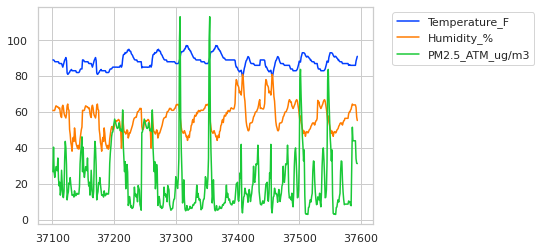

In [299]:
june21.plot()
plt.legend(bbox_to_anchor=(1.5,1), loc="upper right")

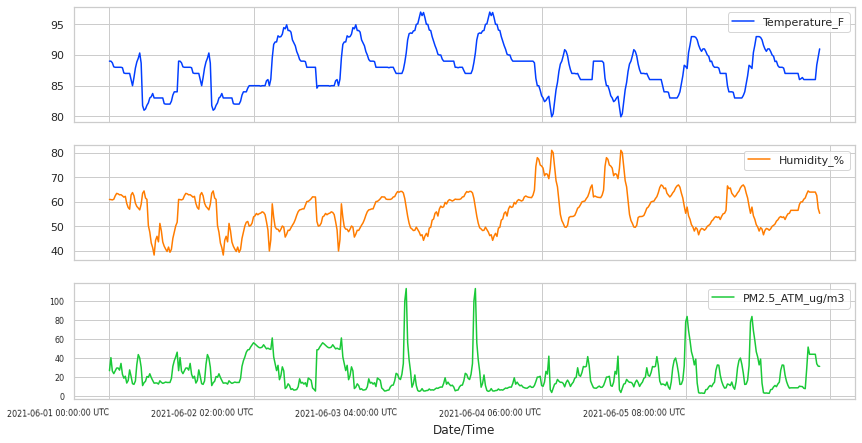

In [297]:
june21.plot(subplots=True, x = 'Date/Time', figsize=(14,8))
plt.tick_params(labelsize = '8.0', labelrotation = 1.0)

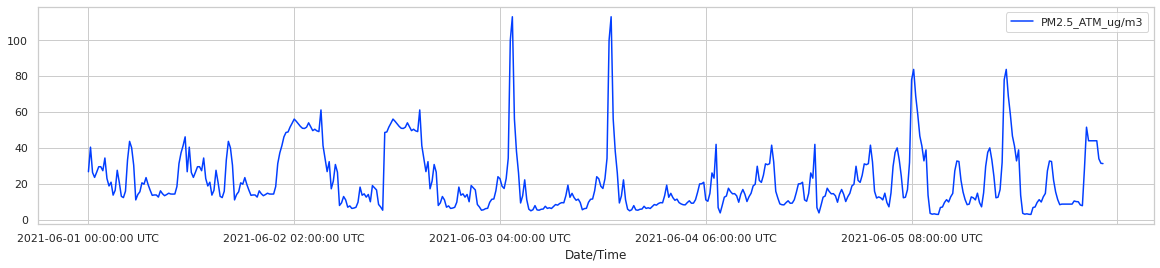

In [284]:
june21.plot(x="Date/Time", y= 'PM2.5_ATM_ug/m3', figsize=(20,4))

#Attempt to locate the first day of the month of June 2021

In [285]:
new_df_ffill.iloc[37101:37150]

,Date/Time,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
37101,2021-06-01 00:00:00 UTC,19.42,28.67,30.12,644.00,-74.40,89.00,61.00,26.84
37102,2021-06-01 00:30:00 UTC,30.49,49.12,52.94,674.00,-75.07,89.00,60.93,40.51
37103,2021-06-01 01:00:00 UTC,17.82,26.56,27.90,704.00,-73.93,88.73,60.80,26.43
37104,2021-06-01 01:30:00 UTC,16.54,23.73,24.91,734.00,-73.47,88.07,61.07,23.70
37105,2021-06-01 02:00:00 UTC,17.95,26.67,28.02,764.00,-72.80,88.00,62.47,26.56
37106,2021-06-01 02:30:00 UTC,20.20,30.23,31.98,794.00,-72.27,88.00,63.47,29.61
37107,2021-06-01 03:00:00 UTC,20.47,30.22,31.92,824.00,-71.27,88.00,63.27,29.64
37108,2021-06-01 03:30:00 UTC,18.84,27.55,28.94,854.00,-72.07,88.00,62.87,27.42
37109,2021-06-01 04:00:00 UTC,24.50,38.36,41.25,884.00,-72.00,88.00,62.93,34.47
37110,2021-06-01 04:30:00 UTC,15.99,23.31,24.50,914.00,-71.53,87.93,62.47,23.08


#01 JUNE 2021

In [286]:
june1_21 = new_df_ffill.iloc[37101:37150]

In [287]:
june1_21 = june1_21[['Date/Time', 'Temperature_F', 'Humidity_%', 'PM2.5_ATM_ug/m3']]

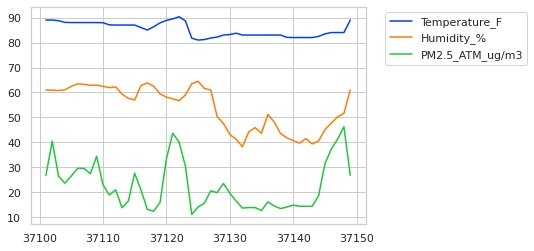

In [288]:
june1_21.plot()
plt.legend(bbox_to_anchor=(1.5,1), loc="upper right")

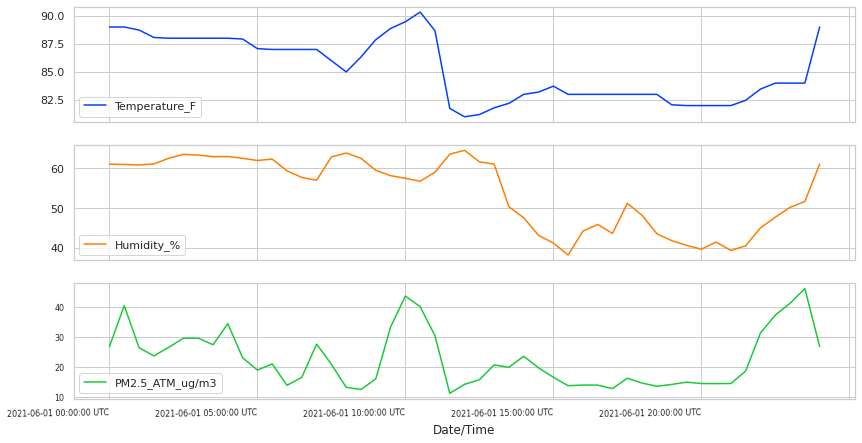

In [295]:
june1_21.plot(subplots=True, x = 'Date/Time', figsize=(14,8))
plt.tick_params(labelsize = '8.0', labelrotation = 1.0)

Text(0, 0.5, 'PM2.5')

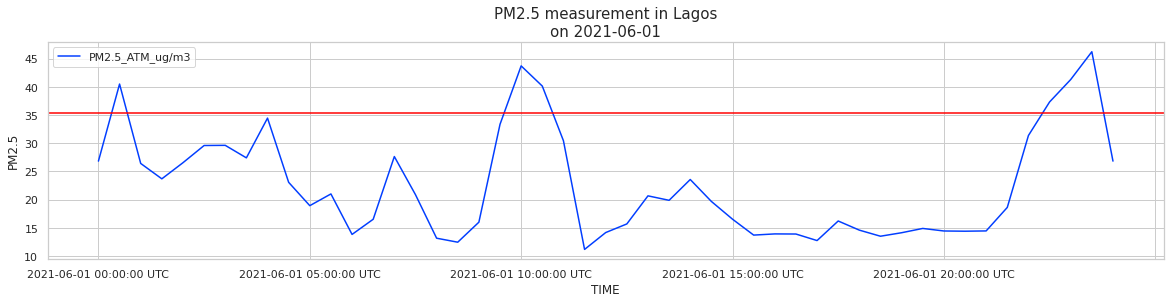

In [290]:
june1_21.plot(x="Date/Time", y= 'PM2.5_ATM_ug/m3', figsize=(20,4))
plt.axhline(35.4, color ="red")
plt.title("PM2.5 measurement in Lagos\non 2021-06-01", size=15)
plt.xlabel('TIME', size=12)
plt.ylabel('PM2.5', size=12)

The 24-hour concentration of PM2.5 is considered unhealthy when it rises above 35.4 μg/m3 (microgram per cubic meter) threshold.

From the above, the pollution is maximum in the late hours of the evening and early hours of the morning. This is because of less wind at night and early hours and that allows pollutants like soot to settle closer to the ground. The hours between noon and 6pm is best.